<a href="https://colab.research.google.com/github/sajeebju/Deep-Learning/blob/main/Pretrained_Model_3D_FaultSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3D Seismic Fault Segmentaiton using Pre-Trained Concolutional Neural Network Model

In [54]:
# Model and Prediction code is derived from - https://github.com/xinwucwp/faultSeg

In [56]:
from keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading model

json_file = open('/content/drive/MyDrive/Python/UNET/model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Python/UNET/pretrained_model.hdf5")
print("Loaded model from disk")

# training image dimensions
n1, n2, n3 = 128, 128, 128

Loaded model from disk


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# set gaussian weights in the overlap bounaries
def getMask(os):
    sc = np.zeros((n1,n2,n3),dtype=np.single)
    sc = sc+1
    sp = np.zeros((os),dtype=np.single)
    sig = os/4
    sig = 0.5/(sig*sig)
    for ks in range(os):
        ds = ks-os+1
        sp[ks] = np.exp(-ds*ds*sig)
    for k1 in range(os):
        for k2 in range(n2):
            for k3 in range(n3):
                sc[k1][k2][k3]=sp[k1]
                sc[n1-k1-1][k2][k3]=sp[k1]
    for k1 in range(n1):
        for k2 in range(os):
            for k3 in range(n3):
                sc[k1][k2][k3]=sp[k2]
                sc[k1][n3-k2-1][k3]=sp[k2]
    for k1 in range(n1):
        for k2 in range(n2):
            for k3 in range(os):
                sc[k1][k2][k3]=sp[k3]
                sc[k1][k2][n3-k3-1]=sp[k3]
    return sc


# Predicitng the Synthetic Seismic Data

1/1 [==============================] - 0s 26ms/step


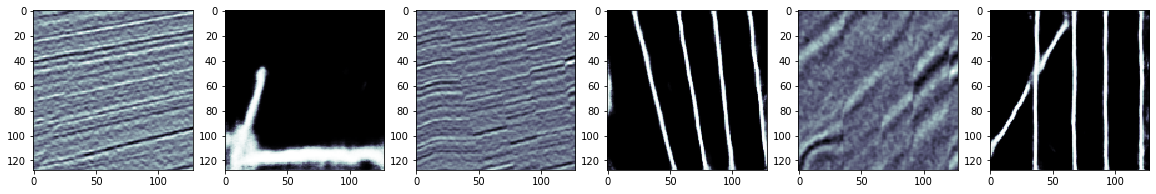

In [85]:
def synthetic_seismic_fault_detection(dataFrom_path, n1, n2, n3):

  gx,m1,m2,m3 = dataFrom_path, n1, n2, n3
  gx = gx-np.min(gx)
  gx = gx/np.max(gx)
  gx = gx*255
  k = 50
  x = np.reshape(gx,(1,n1,n2,n3,1))
  Y = loaded_model.predict(x,verbose=1)
  fig = plt.figure(figsize=(20,20))

  #inline slice
  k1 = 50
  plt.subplot(1, 6, 1)
  imgplot1 = plt.imshow(np.transpose(x[0,k,:,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
  plt.subplot(1, 6, 2)
  imgplot2 = plt.imshow(np.transpose(Y[0,k,:,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)

  #xline slice
  k2 = 110
  plt.subplot(1, 6, 3)
  imgplot1 = plt.imshow(np.transpose(x[0,:,k2,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
  plt.subplot(1, 6, 4)
  imgplot2 = plt.imshow(np.transpose(Y[0,:,k2,:,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)

  #time slice
  k3 = 60
  plt.subplot(1, 6, 5)
  imgplot1 = plt.imshow(np.transpose(x[0,:,:,k3,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)
  plt.subplot(1, 6, 6)
  imgplot2 = plt.imshow(np.transpose(Y[0,:,:,k3,0]),cmap=plt.cm.bone,interpolation='nearest',aspect=1)

# predicting synthetic data
synDataFrom_path = np.fromfile("/content/drive/MyDrive/Python/UNET/seismic/0.dat",dtype=np.single)
synthetic_seismic_fault_detection(synDataFrom_path, n1, n2, n3)


1/1 [==============================] - 0s 24ms/step


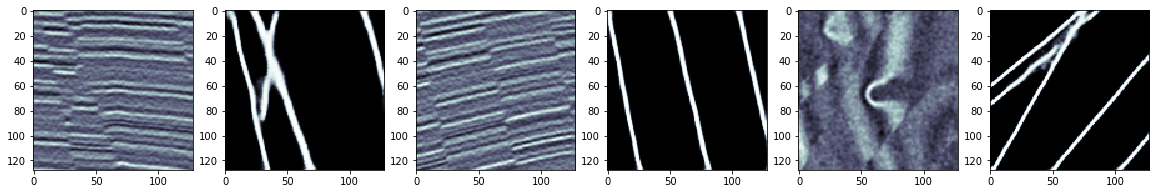

In [79]:
synDataFrom_path = np.fromfile("/content/drive/MyDrive/Python/UNET/seismic/1.dat",dtype=np.single)
synthetic_seismic_fault_detection(synDataFrom_path, n1, n2, n3)

1/1 [==============================] - 0s 24ms/step


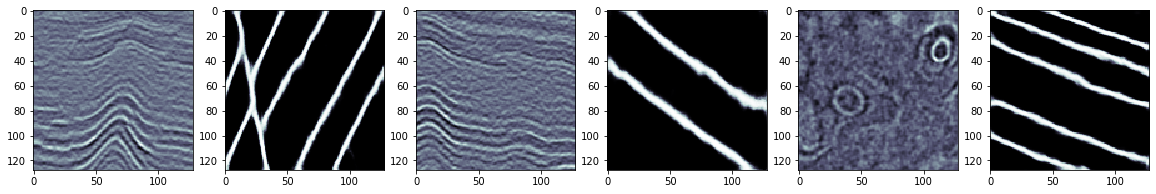

In [82]:
# predicting 8.dat data
synDataFrom_path = np.fromfile("/content/drive/MyDrive/Python/UNET/seismic/8.dat",dtype=np.single)
synthetic_seismic_fault_detection(synDataFrom_path, n1, n2, n3)

1/1 [==============================] - 0s 25ms/step


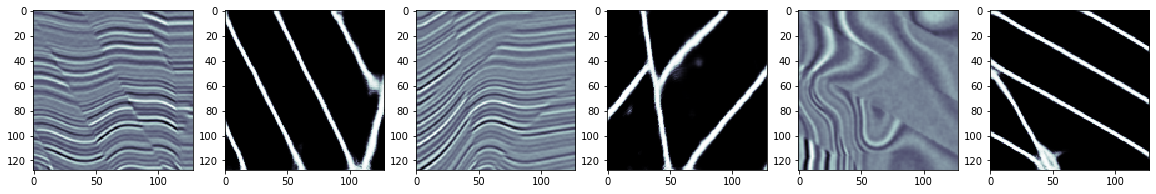

In [81]:
# predicting 8.dat data
synDataFrom_path = np.fromfile("/content/drive/MyDrive/Python/UNET/seismic/9.dat",dtype=np.single)
synthetic_seismic_fault_detection(synDataFrom_path, n1, n2, n3)

1/1 [==============================] - 0s 24ms/step


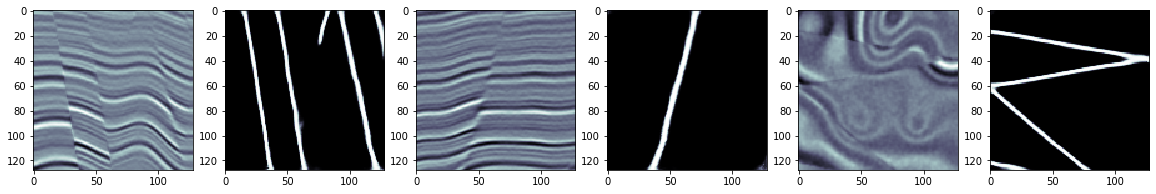

In [83]:
# predicting 8.dat data
synDataFrom_path = np.fromfile("/content/drive/MyDrive/Python/UNET/seismic/10.dat",dtype=np.single)
synthetic_seismic_fault_detection(synDataFrom_path, n1, n2, n3)

# F3 Block 3D Seismic Volume Prediction

1/1 [==============================] - 0s 24ms/step


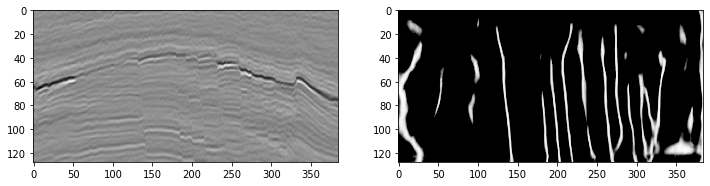

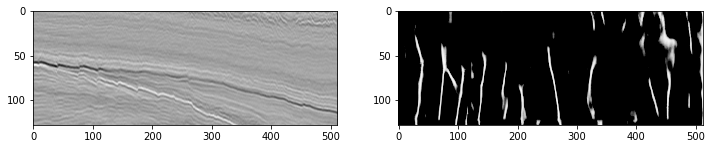

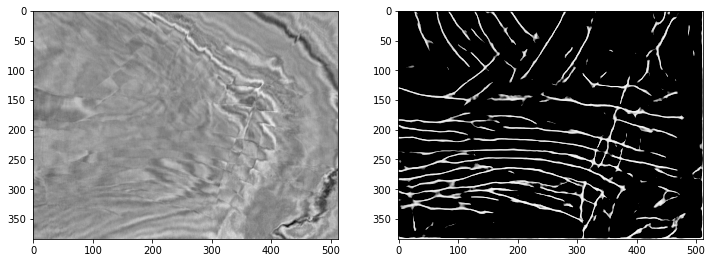

In [65]:
def seismic_fault_detection(m1, m2, m3, n1, n2, n3, a1, a2, a3, dataFrom_path):

  gx,m1,m2,m3 = dataFrom_path,m1, m2, m3
  os = 12 #overlap width
  c1 = np.round((m1+os)/(n1-os)+0.5)
  c2 = np.round((m2+os)/(n2-os)+0.5)
  c3 = np.round((m3+os)/(n3-os)+0.5)
  c1 = int(c1)
  c2 = int(c2)
  c3 = int(c3)

  p1 = (n1-os)*c1+os
  p2 = (n2-os)*c2+os
  p3 = (n3-os)*c3+os

  gx = np.reshape(gx,(m1,m2,m3))
  gp = np.zeros((p1,p2,p3),dtype=np.single)
  gy = np.zeros((p1,p2,p3),dtype=np.single)
  mk = np.zeros((p1,p2,p3),dtype=np.single)
  gs = np.zeros((1,n1,n2,n3,1),dtype=np.single)
  gp[0:m1,0:m2,0:m3]=gx
  sc = getMask(os)

  for k1 in range(c1):
    for k2 in range(c2):
        for k3 in range(c3):
          b1 = k1*n1-k1*os
          e1 = b1+n1
          b2 = k2*n2-k2*os
          e2 = b2+n2
          b3 = k3*n3-k3*os
          e3 = b3+n3
          gs[0,:,:,:,0]=gp[b1:e1,b2:e2,b3:e3]
          gs = gs-np.min(gs)
          gs = gs/np.max(gs)
          gs = gs*255
          Y = loaded_model.predict(gs,verbose=1)
          Y = np.array(Y)
          gy[b1:e1,b2:e2,b3:e3]= gy[b1:e1,b2:e2,b3:e3]+Y[0,:,:,:,0]*sc
          mk[b1:e1,b2:e2,b3:e3]= mk[b1:e1,b2:e2,b3:e3]+sc

  gy = gy/mk
  gy = gy[0:m1,0:m2,0:m3]

  # Reshapa data and visualization

  gx = np.reshape(gx,(m1,m2,m3))
  gy = np.reshape(gy,(m1,m2,m3))

  gx1 = np.transpose(gx[a1,:,:])
  gy1 = np.transpose(gy[a1,:,:])
  gx2 = np.transpose(gx[:,a2,:])
  gy2 = np.transpose(gy[:,a2,:])
  gx3 = np.transpose(gx[:,:,a3])
  gy3 = np.transpose(gy[:,:,a3])

  #xline slice
  fig = plt.figure(figsize=(12,12))
  ax1 = plt.subplot(1, 2, 1)
  ax1.imshow(gx1,aspect=1.5,cmap=plt.cm.gray)
  ax2 = plt.subplot(1,2,2)
  ax2.imshow(gy1,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

  #inline slice
  fig = plt.figure(figsize=(12,12))
  ax1 = plt.subplot(1, 2, 1)
  ax1.imshow(gx2,aspect=1.5,cmap=plt.cm.gray)
  ax2 = plt.subplot(1,2,2)
  ax2.imshow(gy2,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

  #time slice
  fig = plt.figure(figsize=(12,12))
  ax1 = plt.subplot(1, 2, 1)
  ax1.imshow(gx3,cmap=plt.cm.gray)
  ax2 = plt.subplot(1,2,2)
  ax2.imshow(gy3,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

# Assigning parameters value and call the function

m1, m2, m3 = 512, 384, 128
a1, a2, a3 = 29, 29, 99
dataFrom_path = np.fromfile("/content/drive/MyDrive/Python/UNET/f3d/gxl.dat", dtype = np.single)

seismic_fault_detection(m1, m2, m3, n1, n2, n3, a1, a2, a3, dataFrom_path)


# How to predict SGY file ?

In [26]:
#Installing segyio library
!pip install segyio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Convert SGY to DAT File and call the prediction function

In [84]:
import segyio
def predict_sgyFile(sgy_file, a1, a2, a3):
  dat_file =  segyio.tools.cube(sgy_file) # sgy to dat file conversion
  m1, m2, m3 = dat_file.shape

  seismic_fault_detection(m1, m2, m3, n1, n2, n3, a1, a2, a3, dat_file) # calling the prediction function

file_path = "seismic_segy_file.sgy" # select any sgy file

# a1, a2, a3 data to be assigned depending on the file shape
predict_sgyFile(file_path, a1, a2, a3) # finally call this function 
    

# To be updated soon with new SGY file